In [ ]:
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-kor
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tesseract-ocr-kor
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,050 kB of archives.
After this operation, 1,693 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-kor all 4.00~git24-0e00fe6-1.2 [1,050 kB]
Fetched 1,050 kB in 0s (3,829 kB/s)
debcon

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"leebinhye","key":"1c2a994b1f219dae812f61d6d810b0f6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/car-plate-detection
!mkdir ./data
%cd ./data 
!unzip /content/car-plate-detection.zip
%cd /content

In [ ]:
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def extract_img(img_dir,img_name,img_annos_dir,save_imgs):
 
  img=cv2.imread(os.path.join(img_dir,img_name+".png"))
  print(img.shape)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_h,img_w=img.shape[:2]

  img_anno=os.path.join(img_annos_dir,img_name+".txt")
  txt_value=open(img_anno,"r")
  txt_value=txt_value.readlines()
  txt_value=txt_value[0].rstrip().split(" ")

  c_x=float(txt_value[1])
  c_y=float(txt_value[2])
  w=float(txt_value[3])
  h=float(txt_value[4])

  x_min_rect = int(((2 * c_x * img_w) - (w * img_w)) / 2)
  x_max_rect = int(((2 * c_x * img_w) + (w * img_w)) / 2)
  y_min_rect = int(((2 * c_y * img_h) - (h * img_h)) / 2)
  y_max_rect = int(((2 * c_y * img_h) + (h * img_h)) / 2)

  crop_img=img[y_min_rect:y_max_rect,x_min_rect:x_max_rect]

  cv2.imwrite(os.path.join(save_imgs,img_name+".jpg"), crop_img)

  return crop_img

In [ ]:
import os

root_dir="/content/gdrive/MyDrive/License_Plate_Detection_imgs/save_img"

img_names=[txt_file for txt_file in sorted(next(os.walk(root_dir))[2])]

In [ ]:
!mkdir ./save_img

In [ ]:
img_name=np.random.choice(img_names)
img_name=img_name[:img_name.find(".")]
print(img_name)

Cars24


(300, 400, 3)


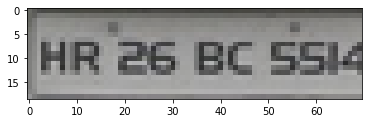

In [ ]:
crop_img=extract_img("/content/data/images",img_name,
                     "/content/gdrive/MyDrive/License_Plate_Detection_imgs/save_img","/content/save_img")

plt.imshow(crop_img)

(300, 400, 3)


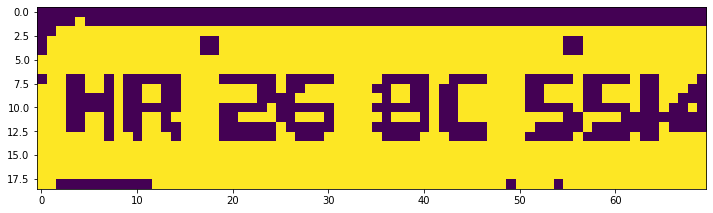

In [ ]:
import pytesseract
import cv2

crop_img=extract_img("/content/data/images",img_name,
                     "/content/gdrive/MyDrive/License_Plate_Detection_imgs/save_img","/content/save_img")

def get_save_img(img_name,img_dir,thr1=100,thr2=255):
  crop_img=cv2.imread(os.path.join(img_dir,img_name+".jpg"))
  gray=cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
  ret,thr=cv2.threshold(gray,thr1,thr2,cv2.THRESH_BINARY)

  return thr

thr=get_save_img(img_name,"/content/save_img",thr1=120,thr2=50)

plt.figure(figsize=(12,12))
plt.imshow(thr)

In [ ]:
img=pytesseract.image_to_string(thr)
img.strip()

'HR 26 BC S5Id'